Introduction
--------------

Image rendering is related to all and any of the techniques that are used to show an image to the user. This requires some conditioning of the image such as enhancing and restoring the image (if necessary) after noise removal or simply adapting the visualization of the image to the display that is available (for instance, we may require to change and smooth the image to make use of all the dynamics of a particular screen).

One of the main situations we encounter when rendering an image is a difference in the amount of bit encoding that we can use for an image. For instance, we may have an image that was encoded by an MRI or a CT using 15 bits but it was then converted into a JPG or PNG file and necessarily lost some information because of the reduction of bits used per pixel.

We will study here the effect that encoding can have in the rendering of an image by presenting the changes on the observed image at different bit encodings. 

We won't be working yet with a complete medical imaging (that will be covered after discussing DICOMs). We will directly open a medical image of the brain that was converted into a PNG and re-encode that image at different depths.

Python provides some tools (always growing) for image processing in the package **scikit-imag**. The module **scypi** also provides imaging processing tools.

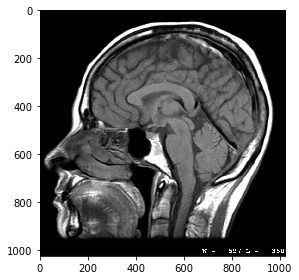

Original (8-bit encoding) the range is: 255


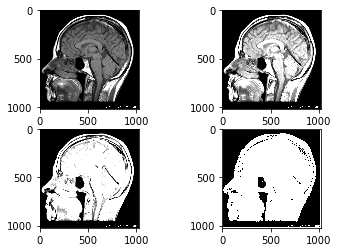

In [6]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = novice.open('braincomplete.png')
brainpic.show()

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
brainpicarray = mpimg.imread('braincomplete.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(brainpicarray))) #showing max value in the image
bp=plt.subplot(221)
plt.imshow(brainpicarray)

#this here only adjust the reduction in coded bits in the image
#we will use Jm where we reduce the encoding to only values between 0 and 200' Km up to 100 and finally Lm up to 50
Jm=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,7)-1)) #reducing encoding
Km=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,6)-1)) #reducing encoding
Lm=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,1)-1)) #reducing to 1 bit
plt.subplot(222)
plt.imshow(Jm)
plt.subplot(223)
plt.imshow(Km)
plt.subplot(224)
plt.imshow(Lm)


Where we can see that reducing the number of encoding bits reduces the dynamic of the image. We already see a difference in the aspect for the first image even though we used the 8-bit original encoding. Where is this coming from? (Tip: the normalization used by imshow takes care of some rendering if we do not!)

In the next part we will show the histogram for the different encoded images, observe those histograms and discuss why if the minimum and maximum of those histograms are still showing 0 and 255 we have an image with less levels of gray. What is the rescale_intensity function doing?

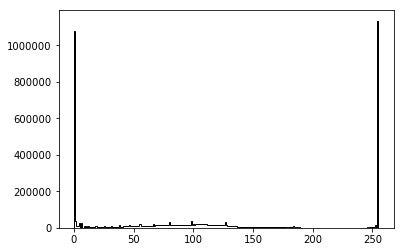

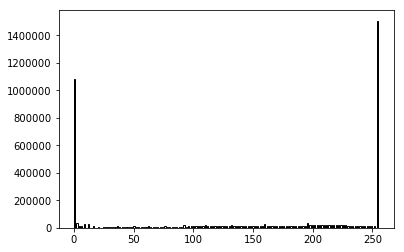

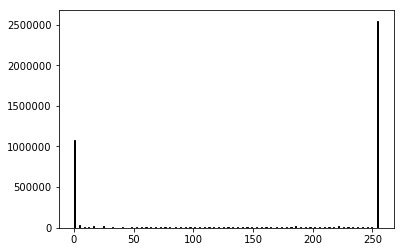

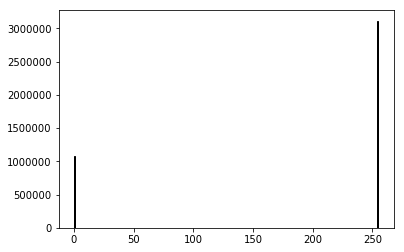

In [7]:
plt.figure()
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Jm.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Km.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Lm.ravel(), bins=256, histtype='step', color='black')

From those histograms we can clearly see that this image has a very large number of very dark and very bright pixels, and that solely rescaling is not increasing visibility of any feature.

Better techniques to modify the rendering of this images are as discussed in class manipulating the histogram, for instance, we can use a histogram equalization.

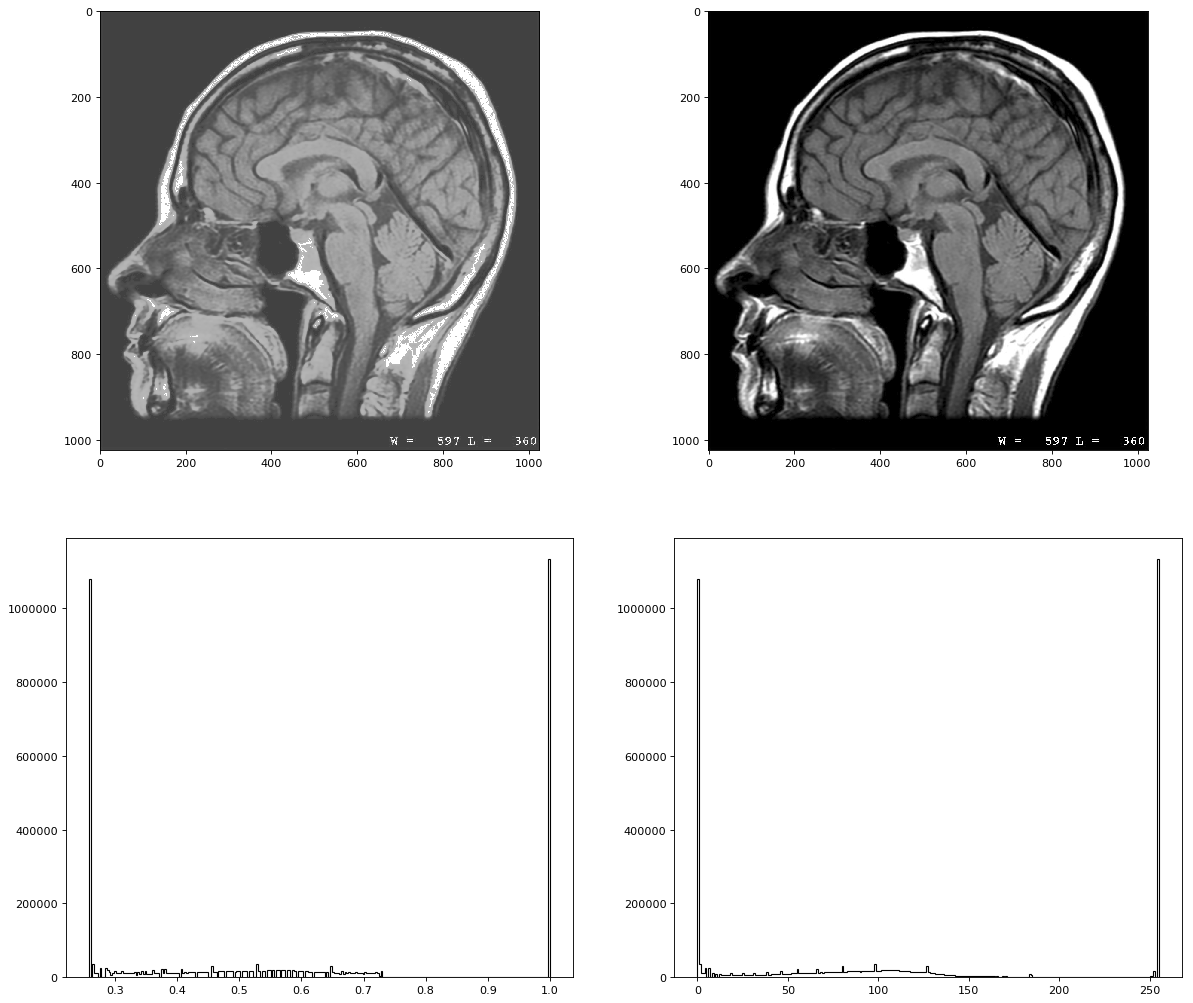

In [8]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(brainpicarray)
plt.subplot(221)
plt.imshow(img_eq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')

Or an equalization that takes the pixels in the percentiles 8% to 70% for the equalization.

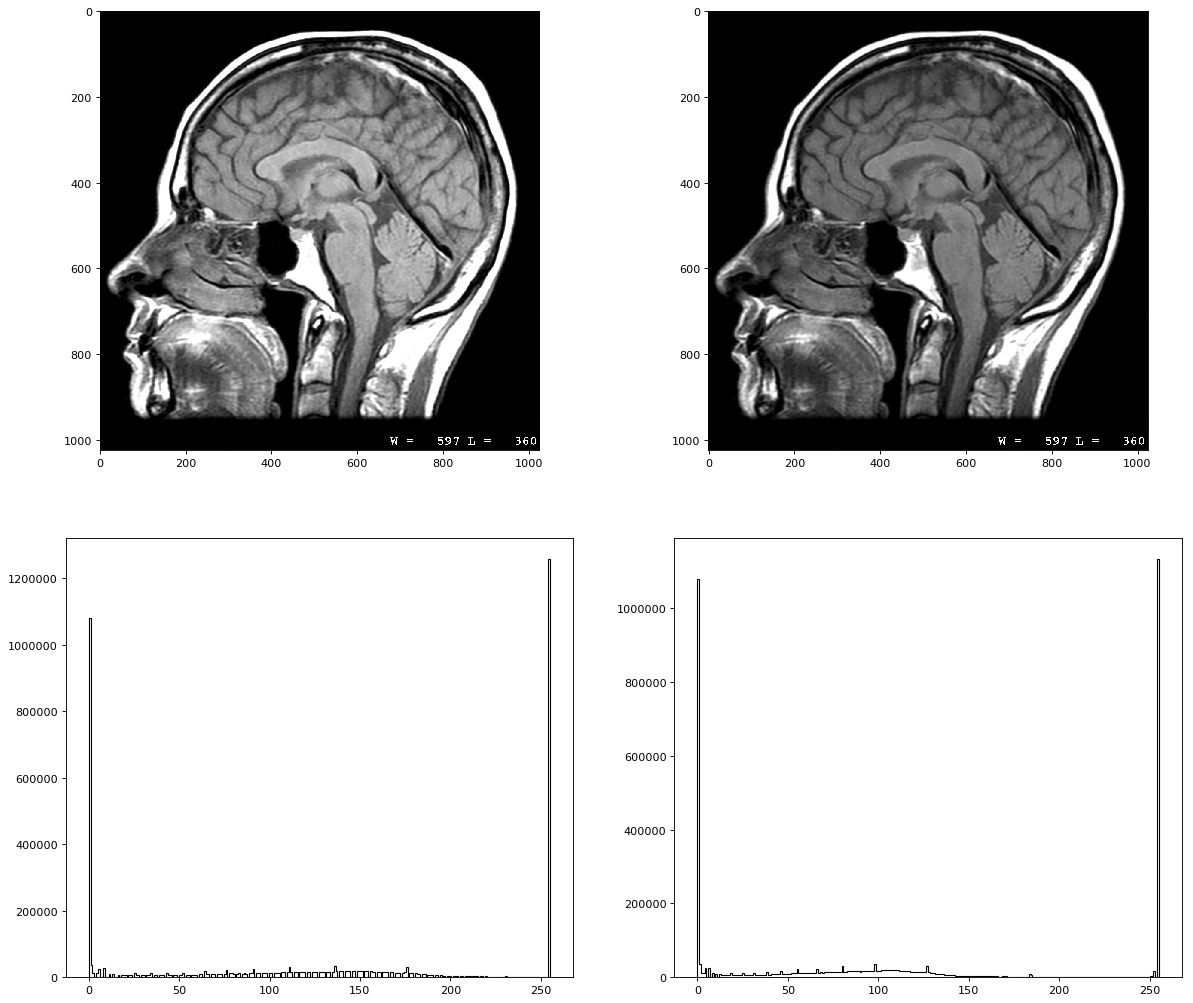

In [9]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
p2, p98 = np.percentile(brainpicarray, (5, 70))
img_eq2 = exposure.rescale_intensity(brainpicarray, in_range=(p2, p98))

plt.subplot(221)
plt.imshow(img_eq2)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')

Or using an adaptive histogram equalization.

C:\Users\vinay\Anaconda2\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


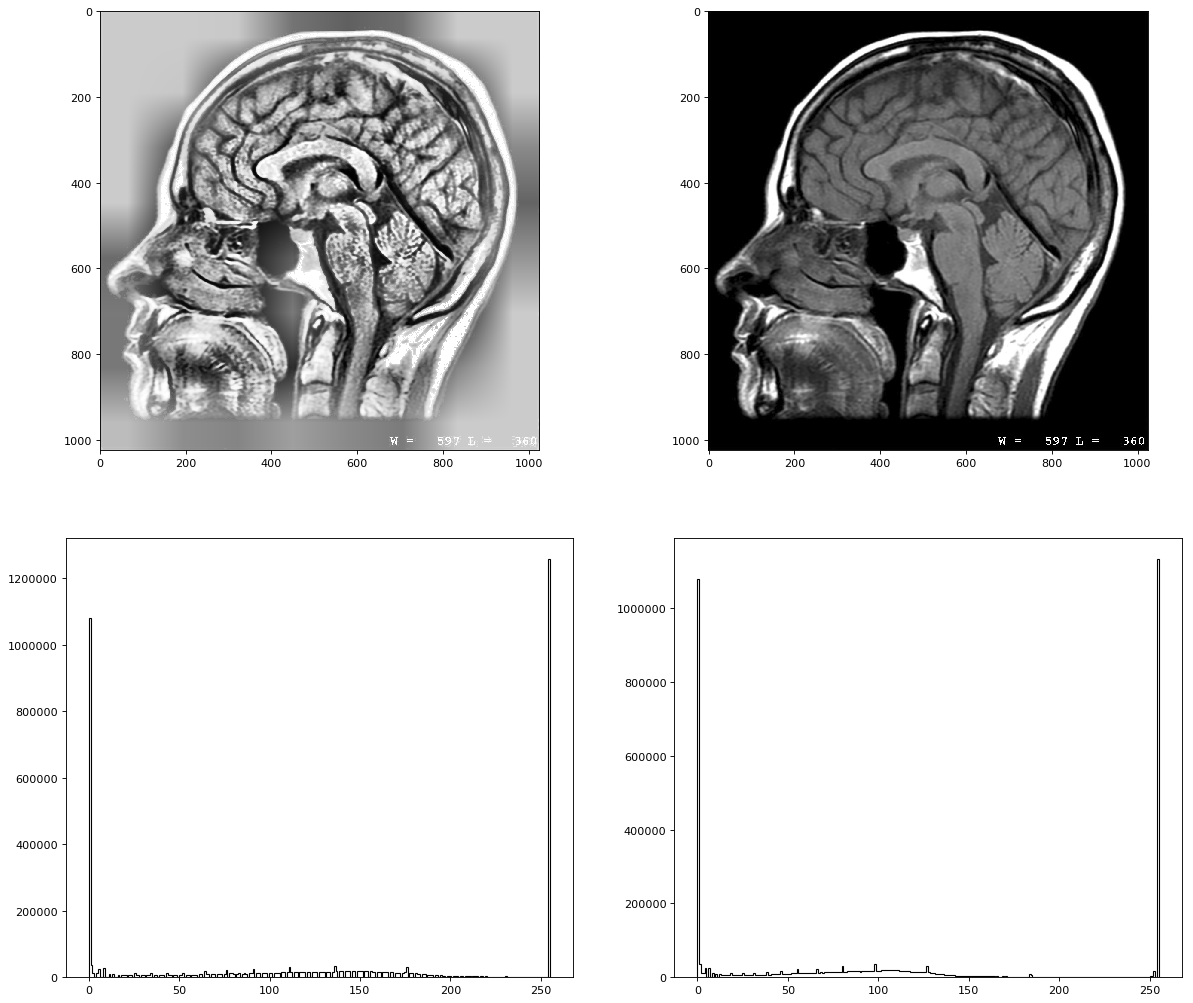

In [10]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.8)

plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')

## There is variation in image when the clip limit is altered

## Summary

In this example we analyze the impact of reducing the encoding bits in an image on the rendering to the user.

Test your knowledge:

* Modify the clip limit in the Adaptive histogram equalization and observe the changes
* Investigate the function equalize_adapthist and analyse the effect of the modification of clip limit according to the function description

Comments and corrections welcome!

References
---------------

* Tinku Acharya and Ajoy K. Ray, *Image Processing - Principles and Applications*. Wiley InterScience, 2006.